<a href="https://colab.research.google.com/github/MohdSiddiq12/Hugging_Face/blob/main/multimodal_question_answering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers.utils import logging
logging.set_verbosity_error()

import warnings
warnings.filterwarnings("ignore", message="Using the model-agnostic default `max_length`")

In [2]:
from transformers import BlipForQuestionAnswering

In [ ]:
model = BlipForQuestionAnswering.from_pretrained(
    "Salesforce/blip-vqa-base")

In [4]:
from transformers import AutoProcessor

In [ ]:
processor = AutoProcessor.from_pretrained(
    "Salesforce/blip-vqa-base")

In [6]:
from PIL import Image

In [18]:
image = Image.open("/content/How-Many-Cats-Is-Too-Many-Cats-760x335.webp")

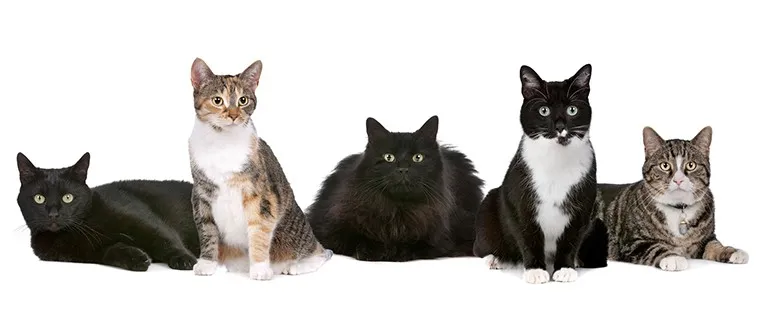

In [23]:
image

In [28]:
question = "what breeds of cats are present in the picture?"

In [29]:
inputs = processor(image, question, return_tensors="pt")

In [30]:
out = model.generate(**inputs)

In [31]:
print(processor.decode(out[0], skip_special_tokens=True))

tabby


In [ ]:
!pip install gradio

In [34]:
import gradio as gr

In [35]:
# Function to answer question based on image
def answer_question(image, question):
    inputs = processor(image, question, return_tensors="pt")
    out = model.generate(**inputs)
    answer = processor.decode(out[0], skip_special_tokens=True)
    return answer

In [41]:
# Create Gradio interface
image_input = gr.Image(label="Upload Image")
question_input = gr.Textbox(label="Ask a Question")
output = gr.Textbox(label="Answer")

In [42]:
interface = gr.Interface(fn=answer_question, inputs=[image_input, question_input], outputs=output, title="Multimodal Question Answering")

In [43]:
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7833e28bc88aac21d5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
